<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/drowsiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!unzip /content/dataset_new.zip 

unzip:  cannot find or open /content/dataset_new.zip, /content/dataset_new.zip.zip or /content/dataset_new.zip.ZIP.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 1310 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary',shuffle=False)

Found 215 images belonging to 2 classes.


In [9]:
im=plt.imread("/content/drive/MyDrive/archive/dataset_new/train/yawn/11.jpg")


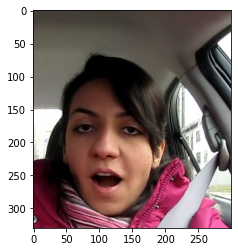

In [10]:
plt.imshow(im[20:350, 200:500, :])

In [11]:
import os

In [12]:
import glob
i=0
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/test/no_yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/test/no_yawn" , f'test_images_noyawn{i}.jpg'), im)

In [13]:

for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/test/yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/test/yawn" , f'test_images_yawn{i}.jpg'), im)

In [14]:
i=0
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/train/no_yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/train/no_yawn" , f'train_images_noyawn{i}.jpg'), im)

In [15]:
i=0
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/train/yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/train/yawn" , f'train_images_yawn{i}.jpg'), im)

In [16]:
# Add the image to a batch
from keras.preprocessing import image
from tensorflow.keras import layers
im=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test")



Found 215 files belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


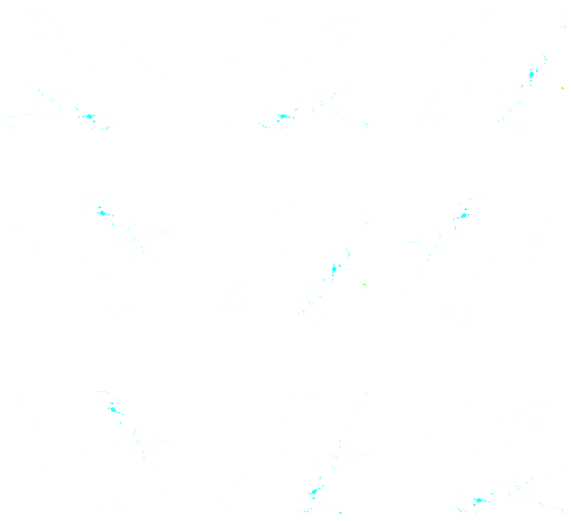

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
image = tf.cast(tf.expand_dims(n, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [17]:
im=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train")

Found 1310 files belonging to 2 classes.


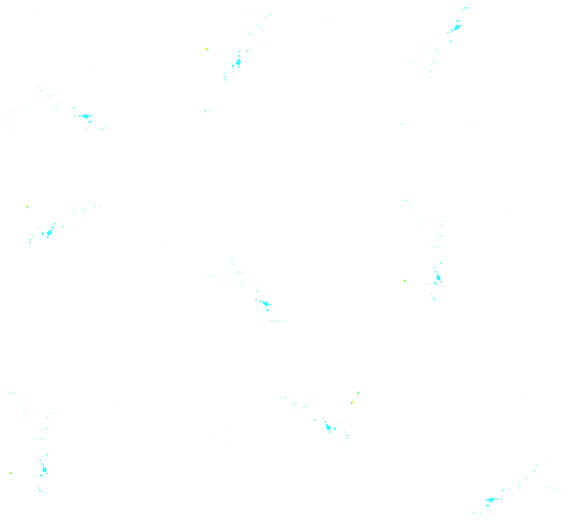

In [19]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
image = tf.cast(tf.expand_dims(n, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [20]:
#build CNN model
#intialize
cnn=tf.keras.models.Sequential()

In [21]:
from tensorflow.keras import layers

In [23]:
#convolution
from keras.regularizers import l2
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
                              
#Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
#add one more layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'
      ))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'
      ))
cnn.add(tf.keras.layers.Dropout(0.25))
#Flatten
cnn.add(tf.keras.layers.Flatten())
#Full Connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))
#Output layer
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [24]:
#Compile the model
cnn.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                  

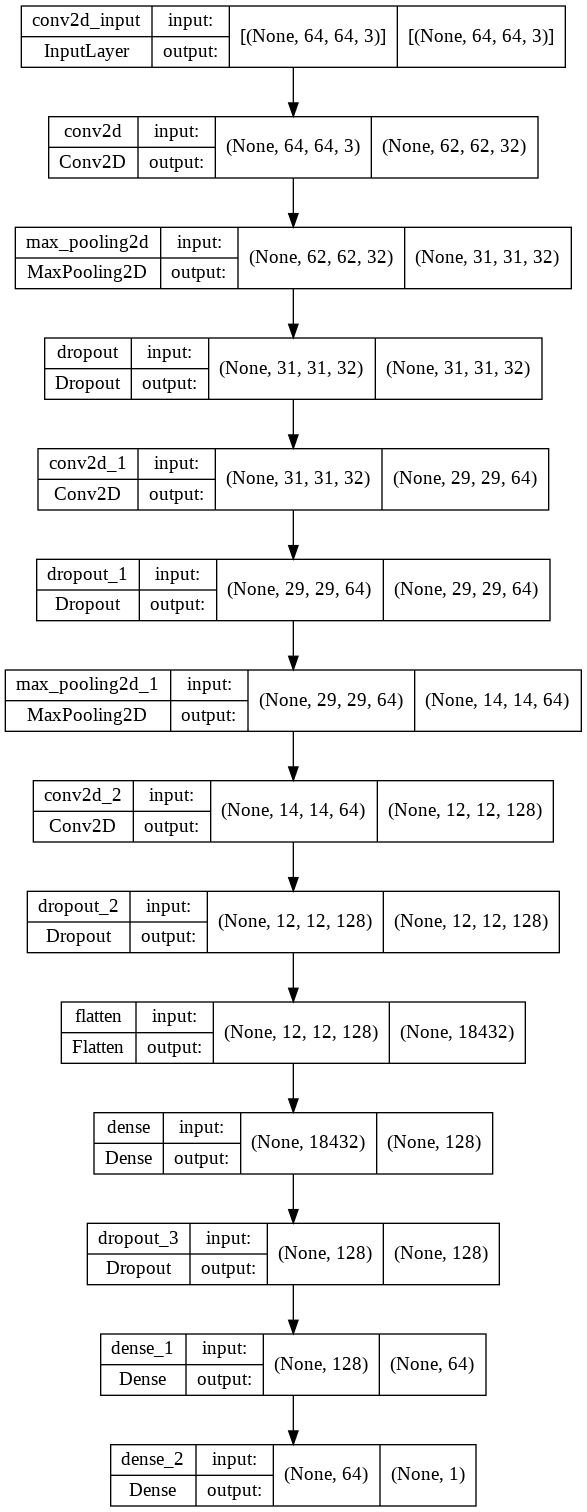

In [ ]:
from tensorflow.keras.models import Model
plot_model(cnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history=cnn.fit(x=train_generator,validation_data=validation_generator,epochs=50)

Epoch 1/50
41/41 [==============================] - 7s 166ms/step - loss: 0.0490 - accuracy: 0.9824 - val_loss: 0.0896 - val_accuracy: 0.9814
Epoch 2/50
41/41 [==============================] - 11s 272ms/step - loss: 0.0589 - accuracy: 0.9763 - val_loss: 0.0664 - val_accuracy: 0.9721
Epoch 3/50
41/41 [==============================] - 14s 330ms/step - loss: 0.0528 - accuracy: 0.9794 - val_loss: 0.0919 - val_accuracy: 0.9767
Epoch 4/50
41/41 [==============================] - 7s 159ms/step - loss: 0.0432 - accuracy: 0.9855 - val_loss: 0.0681 - val_accuracy: 0.9767
Epoch 5/50
41/41 [==============================] - 7s 160ms/step - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.1253 - val_accuracy: 0.9674
Epoch 6/50
41/41 [==============================] - 7s 159ms/step - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0847 - val_accuracy: 0.9721
Epoch 7/50
41/41 [==============================] - 6s 157ms/step - loss: 0.0892 - accuracy: 0.9710 - val_loss: 0.0929 - val_accuracy: 0.9721
Epoc

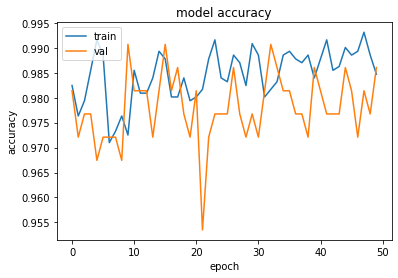

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

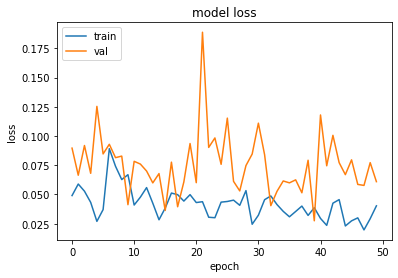

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


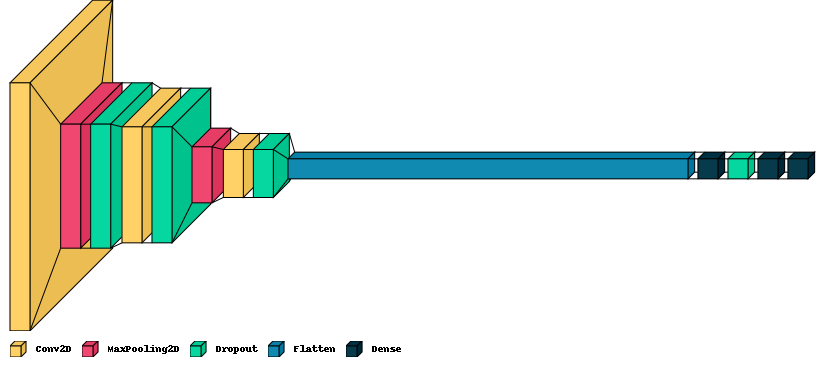

In [ ]:
import visualkeras
visualkeras.layered_view(cnn,legend=True)

In [ ]:
import tensorflow as tf
from tensorflow import keras
model=cnn
model.save('/content/drive/MyDrive/camera/cnnmodel.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/camera/cnnmodel.h5')
history=model.summary()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 dropout_21 (Dropout)        (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                 

In [ ]:
Y_pred = cnn.predict_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
score = cnn.evaluate(validation_generator)
print(score)

7/7 [==============================] - 1s 95ms/step - loss: 0.0991 - accuracy: 0.9721
[0.09913408011198044, 0.9720930457115173]


In [ ]:
score = cnn.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
score

[0.09913408011198044, 0.9720930457115173]

In [ ]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
Y_pred

array([[2.9161962e-04],
       [1.0908221e-04],
       [2.1459507e-06],
       [4.6752964e-04],
       [9.6465768e-03],
       [3.1534100e-09],
       [5.5459436e-02],
       [7.6366402e-02],
       [1.4354962e-04],
       [2.1683923e-03],
       [1.7790349e-04],
       [5.5309222e-04],
       [9.7387666e-03],
       [2.8982988e-01],
       [3.8312585e-03],
       [3.4391407e-02],
       [1.8371435e-02],
       [1.1447028e-03],
       [1.5932595e-04],
       [1.4151791e-03],
       [1.3614725e-03],
       [6.7564738e-03],
       [6.7308205e-03],
       [2.0468990e-04],
       [1.2284523e-02],
       [2.9625667e-03],
       [1.4740875e-03],
       [1.4021104e-03],
       [7.9914375e-04],
       [3.5373471e-04],
       [1.0381978e-03],
       [5.2981242e-04],
       [2.7188212e-03],
       [3.4767610e-04],
       [1.1996420e-04],
       [2.7056556e-02],
       [9.3068513e-05],
       [1.3750839e-05],
       [5.9265457e-04],
       [8.5056955e-03],
       [2.5628094e-04],
       [8.577304

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Y_pred = model.predict_generator(validation_generator)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
Y_pred

array([[2.9161962e-04],
       [1.0908221e-04],
       [2.1459507e-06],
       [4.6752964e-04],
       [9.6465768e-03],
       [3.1534100e-09],
       [5.5459436e-02],
       [7.6366402e-02],
       [1.4354962e-04],
       [2.1683923e-03],
       [1.7790349e-04],
       [5.5309222e-04],
       [9.7387666e-03],
       [2.8982988e-01],
       [3.8312585e-03],
       [3.4391407e-02],
       [1.8371435e-02],
       [1.1447028e-03],
       [1.5932595e-04],
       [1.4151791e-03],
       [1.3614725e-03],
       [6.7564738e-03],
       [6.7308205e-03],
       [2.0468990e-04],
       [1.2284523e-02],
       [2.9625667e-03],
       [1.4740875e-03],
       [1.4021104e-03],
       [7.9914375e-04],
       [3.5373471e-04],
       [1.0381978e-03],
       [5.2981242e-04],
       [2.7188212e-03],
       [3.4767610e-04],
       [1.1996420e-04],
       [2.7056556e-02],
       [9.3068513e-05],
       [1.3750839e-05],
       [5.9265457e-04],
       [8.5056955e-03],
       [2.5628094e-04],
       [8.577304

In [ ]:
y_pred = Y_pred > 0.93
cm= confusion_matrix(validation_generator.classes,y_pred)

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
target_names = ['no_yawn','yawn']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     no_yawn       0.92      1.00      0.96       109
        yawn       1.00      0.92      0.96       106

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



In [ ]:
cm

array([[109,   0],
       [  9,  97]])

In [ ]:
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['no_yawn','yawn']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[109   0]
 [  9  97]]
Classification Report
              precision    recall  f1-score   support

     no_yawn       0.92      1.00      0.96       109
        yawn       1.00      0.92      0.96       106

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



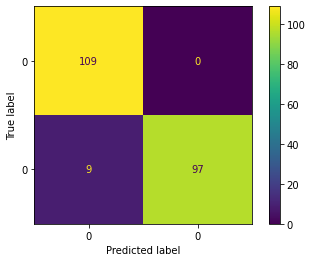

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=validation_generator.classes)
disp.plot()
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img('/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test/no_yawn/test_images_noyawn1.jpg',target_size=(64,64))

test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
    prediction='yawn'
if result[0][1]==1:
    prediction='no yawn'

In [ ]:
prediction

'yawn'

In [ ]:
 train_generator.class_indices
    

{'no_yawn': 0, 'yawn': 1}

In [ ]:
result


array([[1.000000e+00, 5.396631e-24]], dtype=float32)

In [25]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as pl

In [26]:
image_size = [224,224]

In [27]:
train_path = '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train'
valid_path = '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test'

In [28]:
# Add the image to a batch
from keras.preprocessing import image
from tensorflow.keras import layers
im=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test")

Found 215 files belonging to 2 classes.


In [29]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [30]:
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1310 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


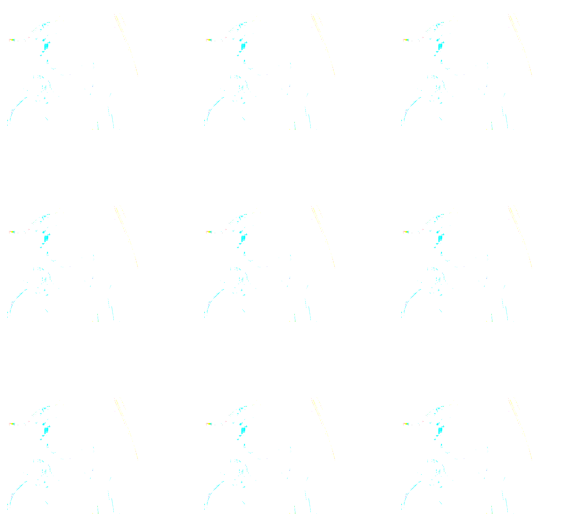

In [31]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
image = tf.cast(tf.expand_dims(n, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [32]:
im=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train")

Found 1310 files belonging to 2 classes.


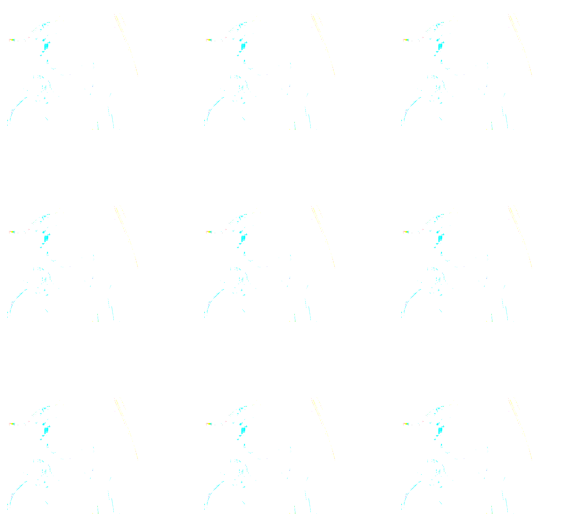

In [33]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
image = tf.cast(tf.expand_dims(n, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [34]:
vgg = VGG16(input_shape=image_size + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [35]:
 # don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [36]:
# useful for getting number of classes
folders = glob("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train/*")
print(len(folders))

2


In [37]:
folders

['/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train/no_yawn',
 '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train/yawn']

In [38]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [39]:
for layer in vgg.layers:
  layer.trainable = False

In [40]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)

In [41]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [42]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [43]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [44]:
history=model.fit(x=training_set,validation_data=test_set,epochs=50)

Epoch 1/50
41/41 [==============================] - 304s 7s/step - loss: 0.5944 - accuracy: 0.6725 - val_loss: 0.4281 - val_accuracy: 0.8000
Epoch 2/50
41/41 [==============================] - 20s 479ms/step - loss: 0.3711 - accuracy: 0.8458 - val_loss: 0.3704 - val_accuracy: 0.8093
Epoch 3/50
41/41 [==============================] - 21s 511ms/step - loss: 0.3094 - accuracy: 0.8786 - val_loss: 0.2800 - val_accuracy: 0.9070
Epoch 4/50
41/41 [==============================] - 20s 484ms/step - loss: 0.2502 - accuracy: 0.9099 - val_loss: 0.2647 - val_accuracy: 0.8837
Epoch 5/50
41/41 [==============================] - 20s 487ms/step - loss: 0.2420 - accuracy: 0.9084 - val_loss: 0.2689 - val_accuracy: 0.8930
Epoch 6/50
41/41 [==============================] - 20s 490ms/step - loss: 0.1990 - accuracy: 0.9366 - val_loss: 0.2262 - val_accuracy: 0.9163
Epoch 7/50
41/41 [==============================] - 20s 491ms/step - loss: 0.1925 - accuracy: 0.9328 - val_loss: 0.2396 - val_accuracy: 0.9163
E

In [45]:
import tensorflow as tf
from tensorflow import keras
model.save('/content/drive/MyDrive/camera/vgg16model.h5')

In [46]:
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/camera/vgg16model.h5")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

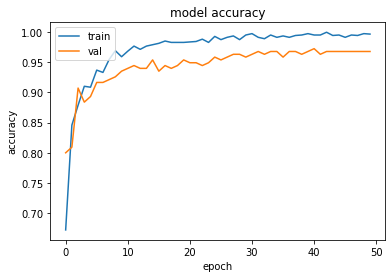

In [47]:
# accuracy
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

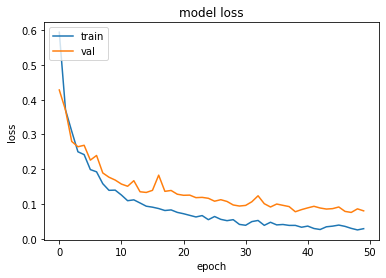

In [48]:
# loss
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [51]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test',
        target_size=(224,224),
        batch_size=32,
        class_mode='binary',shuffle=False)

Found 215 images belonging to 2 classes.


In [52]:
Y_pred=model.predict_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [53]:
Y_pred

array([[1.86499953e-01],
       [4.35899099e-04],
       [5.79805856e-05],
       [1.72364654e-03],
       [4.02238034e-02],
       [7.15387170e-04],
       [8.31385314e-01],
       [4.39998060e-02],
       [5.38137916e-04],
       [1.17957057e-03],
       [2.36822218e-02],
       [4.77041863e-03],
       [1.90441106e-02],
       [9.57527459e-01],
       [1.58751232e-03],
       [1.43967714e-04],
       [8.39024491e-04],
       [3.73381563e-02],
       [1.67260252e-04],
       [1.01790682e-03],
       [1.29284516e-01],
       [5.28717600e-03],
       [3.71501185e-02],
       [8.72654654e-03],
       [1.00419566e-01],
       [2.70756264e-03],
       [1.66544260e-03],
       [3.44199613e-02],
       [3.77300307e-02],
       [1.56172703e-03],
       [2.50785183e-02],
       [2.26525724e-01],
       [7.50607476e-02],
       [1.56472176e-02],
       [4.58961149e-05],
       [1.19937421e-03],
       [9.37366804e-06],
       [5.26409785e-05],
       [4.43149684e-03],
       [4.10067648e-01],


In [54]:
validation_generator.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = Y_pred >0.95
y_pred


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Y_pred = model.predict_generator(validation_generator)
Y_pred


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


array([[1.86499953e-01],
       [4.35899099e-04],
       [5.79805856e-05],
       [1.72364654e-03],
       [4.02238034e-02],
       [7.15387170e-04],
       [8.31385314e-01],
       [4.39998060e-02],
       [5.38137916e-04],
       [1.17957057e-03],
       [2.36822218e-02],
       [4.77041863e-03],
       [1.90441106e-02],
       [9.57527459e-01],
       [1.58751232e-03],
       [1.43967714e-04],
       [8.39024491e-04],
       [3.73381563e-02],
       [1.67260252e-04],
       [1.01790682e-03],
       [1.29284516e-01],
       [5.28717600e-03],
       [3.71501185e-02],
       [8.72654654e-03],
       [1.00419566e-01],
       [2.70756264e-03],
       [1.66544260e-03],
       [3.44199613e-02],
       [3.77300307e-02],
       [1.56172703e-03],
       [2.50785183e-02],
       [2.26525724e-01],
       [7.50607476e-02],
       [1.56472176e-02],
       [4.58961149e-05],
       [1.19937421e-03],
       [9.37366804e-06],
       [5.26409785e-05],
       [4.43149684e-03],
       [4.10067648e-01],


In [57]:
y_pred = Y_pred > 0.93
y_pred


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
y_pred = Y_pred>0.95
y_pred


array([[[[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]],

        [[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]]],


       [[[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]],

        [[ True, False, False, ..., False,  True, False],
         [ True, False, False, ..., False,  True, False]]],


       [[[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]],

        [[ True, False,  True, ..., False, False, False],
         [ True, False, False, ..., False, False, False]]],


       ...,


       [[[False, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]],

        [[False, False, False, ..., False,  True, False],
         [False, False, False, ..., False,  True, False]]],


       [[[ True, False, False, ...

In [ ]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [58]:
target_names = ['no_yawn','yawn']

In [59]:
from sklearn.metrics import classification_report
print(confusion_matrix(validation_generator.classes, y_pred))
print('Confusion Matrix')


[[108   1]
 [ 14  92]]
Confusion Matrix


In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(validation_generator.classes, y_pred)

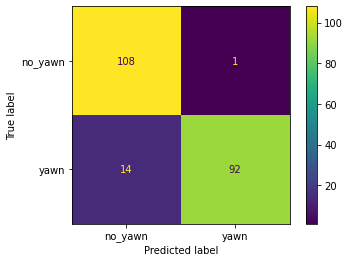

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
disp.plot()
plt.show()


In [66]:
print('Classification Report')
target_names = ['no_yawn','yawn']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     no_yawn       0.89      0.99      0.94       109
        yawn       0.99      0.87      0.92       106

    accuracy                           0.93       215
   macro avg       0.94      0.93      0.93       215
weighted avg       0.94      0.93      0.93       215



In [67]:
import numpy as np
from keras.preprocessing.image import image
from keras.preprocessing.image import img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [68]:
training_set=("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train")
test_set=("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test")

In [69]:
train_generator.class_indices
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


Found 1310 images belonging to 2 classes.


In [70]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 215 images belonging to 2 classes.


In [71]:
resnet_model = Sequential()
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(64,64,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
resnet_model.add(pretrained_model)

94781440/94765736 [==============================] - 1s 0us/step


In [72]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(tf.keras.layers.Dropout(0.3))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(tf.keras.layers.Dropout(0.3))
resnet_model.add(Dense(1, activation='sigmoid'))

In [73]:
resnet_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [74]:
resnet_model.compile(
  loss='binary_crossentropy',
  optimizer='RMSprop',
  metrics=['accuracy'])

In [76]:
history=resnet_model.fit(x=train_generator,validation_data=validation_generator,epochs=40)

Epoch 1/40
41/41 [==============================] - 8s 182ms/step - loss: 0.6147 - accuracy: 0.6504 - val_loss: 0.9242 - val_accuracy: 0.5023
Epoch 2/40
41/41 [==============================] - 7s 170ms/step - loss: 0.6130 - accuracy: 0.6435 - val_loss: 0.6132 - val_accuracy: 0.6419
Epoch 3/40
41/41 [==============================] - 8s 190ms/step - loss: 0.6158 - accuracy: 0.6351 - val_loss: 0.6109 - val_accuracy: 0.6326
Epoch 4/40
41/41 [==============================] - 7s 167ms/step - loss: 0.6126 - accuracy: 0.6504 - val_loss: 0.6199 - val_accuracy: 0.6326
Epoch 5/40
41/41 [==============================] - 7s 169ms/step - loss: 0.6146 - accuracy: 0.6382 - val_loss: 0.6043 - val_accuracy: 0.6512
Epoch 6/40
41/41 [==============================] - 7s 165ms/step - loss: 0.6214 - accuracy: 0.6305 - val_loss: 0.6048 - val_accuracy: 0.6558
Epoch 7/40
41/41 [==============================] - 7s 164ms/step - loss: 0.6179 - accuracy: 0.6389 - val_loss: 0.6095 - val_accuracy: 0.6186
Epoch 

In [77]:
import tensorflow as tf
from tensorflow import keras
model=resnet_model
model.save('/content/drive/MyDrive/camera/resnet50model.h5')


In [78]:
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/camera/resnet50model.h5")
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                

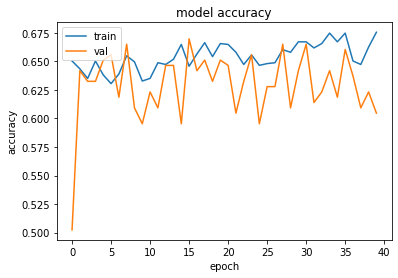

In [79]:
# accuracy
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

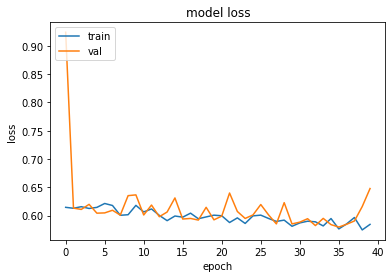

In [80]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [89]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary',shuffle=False)

Found 215 images belonging to 2 classes.


In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Y_pred = resnet_model.predict_generator(validation_generator)
Y_pred



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


array([[0.4002377 ],
       [0.4713444 ],
       [0.59117675],
       [0.8818911 ],
       [0.35798183],
       [0.39300218],
       [0.9585116 ],
       [0.08125034],
       [0.46873263],
       [0.6638    ],
       [0.47968844],
       [0.440572  ],
       [0.40206197],
       [0.870149  ],
       [0.74660397],
       [0.49259874],
       [0.7371485 ],
       [0.49766397],
       [0.51646554],
       [0.70033306],
       [0.4398219 ],
       [0.3718642 ],
       [0.53243345],
       [0.71444416],
       [0.47113967],
       [0.5660808 ],
       [0.6431272 ],
       [0.7203982 ],
       [0.45049462],
       [0.51513034],
       [0.42396942],
       [0.5601394 ],
       [0.51999146],
       [0.35814038],
       [0.52802247],
       [0.46036127],
       [0.45603684],
       [0.4598398 ],
       [0.44612452],
       [0.42927647],
       [0.49079177],
       [0.6631527 ],
       [0.5115911 ],
       [0.39977652],
       [0.47730508],
       [0.55813324],
       [0.6093156 ],
       [0.721

In [91]:
validation_generator.classes
Y_pred


array([[0.4002377 ],
       [0.4713444 ],
       [0.59117675],
       [0.8818911 ],
       [0.35798183],
       [0.39300218],
       [0.9585116 ],
       [0.08125034],
       [0.46873263],
       [0.6638    ],
       [0.47968844],
       [0.440572  ],
       [0.40206197],
       [0.870149  ],
       [0.74660397],
       [0.49259874],
       [0.7371485 ],
       [0.49766397],
       [0.51646554],
       [0.70033306],
       [0.4398219 ],
       [0.3718642 ],
       [0.53243345],
       [0.71444416],
       [0.47113967],
       [0.5660808 ],
       [0.6431272 ],
       [0.7203982 ],
       [0.45049462],
       [0.51513034],
       [0.42396942],
       [0.5601394 ],
       [0.51999146],
       [0.35814038],
       [0.52802247],
       [0.46036127],
       [0.45603684],
       [0.4598398 ],
       [0.44612452],
       [0.42927647],
       [0.49079177],
       [0.6631527 ],
       [0.5115911 ],
       [0.39977652],
       [0.47730508],
       [0.55813324],
       [0.6093156 ],
       [0.721

In [98]:
y_pred=Y_pred>0.93
cm= confusion_matrix(validation_generator.classes,y_pred)
y_pred



array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [93]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [99]:
target_names = ['no_yawn','yawn']
print(classification_report(validation_generator.classes, y_pred,target_names=target_names))


              precision    recall  f1-score   support

     no_yawn       0.59      0.98      0.74       109
        yawn       0.94      0.30      0.46       106

    accuracy                           0.65       215
   macro avg       0.77      0.64      0.60       215
weighted avg       0.76      0.65      0.60       215



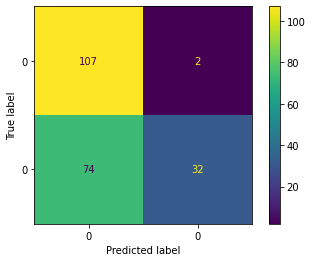

In [100]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=validation_generator.classes)
disp.plot()
plt.show()


In [ ]:
Y_pred = model.predict_generator(validation_generator)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Y_pred = model.predict_generator(validation_generator)
cm= confusion_matrix(validation_generator.classes, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=targets.classes_)
disp.plot()
plt.show()


NameError: ignored

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train",
                                                    batch_size = 32,
                                                    class_mode = 'binary', 
                                                    target_size = (150,150))     


validation_generator =  test_datagen.flow_from_directory( "/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test",
                                                          batch_size  = 32,
                                                          class_mode  = 'binary', 
                                                          target_size = (150,150))

Found 1310 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [ ]:
tf.keras.applications.InceptionV3(
    weights=None,
    include_top= False,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=2,
    classifier_activation="softmax",
)

In [ ]:
model=InceptionV3()
from keras.layers import Activation, Dense

from keras.models import Sequential
model = Sequential()
model.add(InceptionV3())
model.add(Dense(1,activation="softmax"))
model.compile(optimizer ='RMSprop', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1000)              23851784  
                                                                 
 dense (Dense)               (None, 1)                 1001      
                                                                 
Total params: 23,852,785
Trainable params: 23,818,353
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
history = model.fit(train_generator,validation_data =validation_generator,epochs =10)

Epoch 1/10
16/41 [==========>...................] - ETA: 7s - loss: 0.5688 - acc: 0.5137

KeyboardInterrupt: ignored